In [22]:
#Import all necessary liberies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import joblib

# Import more libraries for presenting good visualizations 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [1]:
import pandas as pd 
# Load the data set
df = pd.read_csv("Data\health_brest_cancer_dataSet.csv")
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [2]:
df.shape


(569, 33)

In [3]:
list(df.columns)


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [4]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [2]:
# Remove the fields from the data set that we don't
# want to include in our model
df = df.drop(columns=['id'])
df = df.drop(columns=['radius_worst'])
df = df.drop(columns=['texture_worst'])
df = df.drop(columns=['perimeter_worst'])
df = df.drop(columns=['area_worst'])
df = df.drop(columns=['smoothness_worst'])
df = df.drop(columns=['compactness_worst'])
df = df.drop(columns=['concavity_worst'])
df = df.drop(columns=['concave points_worst'])
df = df.drop(columns=['symmetry_worst'])
df = df.drop(columns=['fractal_dimension_worst'])
df = df.drop(columns=['radius_se'])
df = df.drop(columns=['texture_se'])
df = df.drop(columns=['perimeter_se'])
df = df.drop(columns=['area_se'])
df = df.drop(columns=['smoothness_se'])
ddf = df.drop(columns=['compactness_se'])
df = df.drop(columns=['concavity_se'])
df = df.drop(columns=['concave points_se'])
df = df.drop(columns=['symmetry_se'])
df = df.drop(columns=['fractal_dimension_se'])
df = df.drop(columns=['compactness_se'])
df = df.drop(columns=['Unnamed: 32'])


In [6]:
list(df.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [5]:
df.rename(columns={'diagnosis': 'Diagnosis'}, inplace=True)
df.rename(columns={'radius_mean': 'Radius'}, inplace=True)
df.rename(columns={'texture_mean': 'Texture'}, inplace=True)
df.rename(columns={'perimeter_mean': 'Perimeter'}, inplace=True)
df.rename(columns={'area_mean': 'Area'}, inplace=True)
df.rename(columns={'smoothness_mean': 'Smoothness'}, inplace=True)
df.rename(columns={'compactness_mean': 'Compactness'}, inplace=True)
df.rename(columns={'concavity_mean': 'Concavity'}, inplace=True)
df.rename(columns={'concave points_mean': 'Concave Points'}, inplace=True)
df.rename(columns={'symmetry_mean': 'Symmetry'}, inplace=True)
df.rename(columns={'fractal_dimension_mean': 'Fractal Dimension'}, inplace=True)

In [6]:
print(df.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


In [13]:
df.head(10)

# Get minmax value of each column
df.describe()


,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [10]:
df.shape
list(df.columns)

['Diagnosis',
 'Radius',
 'Texture',
 'Perimeter',
 'Area',
 'Smoothness',
 'Compactness',
 'Concavity',
 'Concave Points',
 'Symmetry',
 'Fractal Dimension']

In [11]:
df['Radius'].hist(bins=30)
plt.title('Distribution of Radius')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [12]:
df.boxplot(column='Radius', by='Diagnosis')
plt.title('Box plot of Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius')
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

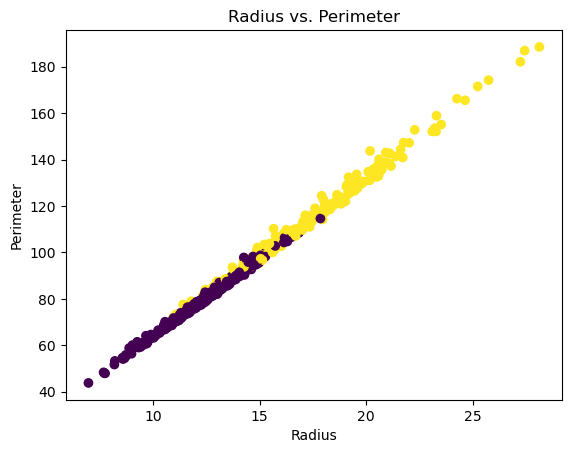

In [35]:
plt.scatter(df['Radius'], df['Perimeter'], c=df['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0))
plt.title('Radius vs. Perimeter')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()



In [16]:
import sklearn
from sklearn import model_selection


# Convert DF to a numpy array
array = df.to_numpy()

# Select only first 4 columns (features) and assign to X
X = array[:,1:10] # 1:10 means 1 to 9
X = pd.DataFrame(X)
print(X)
# Select last column (target) and assign to y
y = array[:,0]

# We want a split size of 80%-20%
size = 0.20

# A random seed number will just maintain repeatibility for every run
# This ensures that each time you run your code with the same seed value, you will get the same data split.
seed = 7

# train_test_split() will split the data to 4 sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=seed)


# Convert X_trainn to numpy array
X_train = pd.DataFrame(X_train)

feature_names = X_train.columns.tolist()
print(feature_names)

# Show Columns names and their index of X_train
for i, v in enumerate(X_train.columns):
    print(i, v)


         0      1      2       3        4        5        6        7       8
0    17.99  10.38  122.8  1001.0   0.1184   0.2776   0.3001   0.1471  0.2419
1    20.57  17.77  132.9  1326.0  0.08474  0.07864   0.0869  0.07017  0.1812
2    19.69  21.25  130.0  1203.0   0.1096   0.1599   0.1974   0.1279  0.2069
3    11.42  20.38  77.58   386.1   0.1425   0.2839   0.2414   0.1052  0.2597
4    20.29  14.34  135.1  1297.0   0.1003   0.1328    0.198   0.1043  0.1809
..     ...    ...    ...     ...      ...      ...      ...      ...     ...
564  21.56  22.39  142.0  1479.0    0.111   0.1159   0.2439   0.1389  0.1726
565  20.13  28.25  131.2  1261.0   0.0978   0.1034    0.144  0.09791  0.1752
566   16.6  28.08  108.3   858.1  0.08455   0.1023  0.09251  0.05302   0.159
567   20.6  29.33  140.1  1265.0   0.1178    0.277   0.3514    0.152  0.2397
568   7.76  24.54  47.92   181.0  0.05263  0.04362      0.0      0.0  0.1587

[569 rows x 9 columns]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
0 0
1 1
2 2
3 3
4 4
5 5


In [37]:
LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(gamma='auto')

In [38]:
LR.fit(X_train,y_train)
LDA.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
NB.fit(X_train,y_train)
SVM.fit(X_train,y_train)

C:\Users\jiayo\anaconda3\envs\MLDb_02\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVC(gamma='auto')

In [39]:
accuracy_score_LR = accuracy_score(y_test,LR.predict(X_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_NB = accuracy_score(y_test,NB.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('NB:',accuracy_score_NB)
print('SVM:',accuracy_score_SVM)

LR: 0.9473684210526315
LDA: 0.9035087719298246
KNN: 0.9035087719298246
CART: 0.9210526315789473
NB: 0.9298245614035088
SVM: 0.7456140350877193


In [40]:
# Define model
model = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9362637362637363
Test set accuracy: 0.9736842105263158
Classification report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        74
           M       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[74  0]
 [ 3 37]]


In [41]:
joblib.dump(LR,"brest_cancer_app.pkl")

['brest_cancer_app.pkl']